# Kaggle - WiDS Datathon 2022

## Modelo Histórico - Lags + medias históricas

# 1. Modules

In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

#model
from catboost import CatBoostRegressor

import xgboost
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE

# 2. Data

In [107]:
train_path = 'https://raw.githubusercontent.com/ccollado7/wds-datathon-2022/main/data/raw/train_last.csv'
#train_path='C:/Users/flavi/Documents/DataScience/kaggle/wids_2022/wds-datathon-2022/data/raw/train_last.csv'
test_path = 'https://raw.githubusercontent.com/ccollado7/wds-datathon-2022/main/data/raw/test_last.csv'
#test_path='C:/Users/flavi/Documents/DataScience/kaggle/wids_2022/wds-datathon-2022/data/raw/test_last.csv'
submit_path = 'https://raw.githubusercontent.com/ccollado7/wds-datathon-2022/main/data/raw/sample_solution.csv'
#submit_path = 'C:/Users/flavi/Documents/DataScience/kaggle/wids_2022/wds-datathon-2022/data/raw/sample_solution.csv'

### Datos típicos:
+ Se usan solo para referencia
https://www.energystar.gov/sites/default/files/tools/Climate_and_Weather_2020_508.pdf

+ Referencias de Site_EUI y Source_EUI  (eui_normal.pdf)
https://www.energystar.gov/buildings/benchmark/understand_metrics/score_details

In [79]:
#train dataset
train = pd.read_csv(train_path)
train.head()

,Year_Factor,State_Factor,building_class,facility_type,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,...,days_below_0F_last,days_above_80F_last,days_above_90F_last,days_above_100F_last,days_above_110F_last,direction_max_wind_speed_last,direction_peak_wind_speed_last,max_wind_speed_last,days_with_fog_last,site_eui_last
0,1,State_1,Commercial,Grocery_store_or_food_market,61242,1942.0,11.0,2.4,36,50.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,State_1,Commercial,Warehouse_Distribution_or_Shipping_center,274000,1955.0,45.0,1.8,36,50.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,State_1,Commercial,Retail_Enclosed_mall,280025,1951.0,97.0,1.8,36,50.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,State_1,Commercial,Education_Other_classroom,55325,1980.0,46.0,1.8,36,50.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,State_1,Commercial,Warehouse_Nonrefrigerated,66000,1985.0,100.0,2.4,36,50.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [80]:
#test dataset
test = pd.read_csv(test_path)
test.head()

,Year_Factor,State_Factor,building_class,facility_type,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,...,days_below_0F_last,days_above_80F_last,days_above_90F_last,days_above_100F_last,days_above_110F_last,direction_max_wind_speed_last,direction_peak_wind_speed_last,max_wind_speed_last,days_with_fog_last,site_eui_last
0,7,State_1,Commercial,Grocery_store_or_food_market,28484,1994.0,37.0,2.4,38,50.596774,...,0.0,83.6,25.400000,3.200000,0.0,NaN,NaN,NaN,88.0,147.640984
1,7,State_1,Commercial,Grocery_store_or_food_market,21906,1961.0,55.0,45.7,38,50.596774,...,0.0,72.5,22.750000,3.750000,0.0,NaN,NaN,NaN,NaN,289.311781
2,7,State_1,Commercial,Grocery_store_or_food_market,16138,1950.0,1.0,59.1,38,50.596774,...,0.0,72.5,22.750000,3.750000,0.0,NaN,NaN,NaN,NaN,152.767192
3,7,State_1,Commercial,Grocery_store_or_food_market,97422,1971.0,34.0,35.4,38,50.596774,...,0.0,69.5,21.000000,2.666667,0.0,NaN,NaN,NaN,88.0,269.464612
4,7,State_1,Commercial,Grocery_store_or_food_market,61242,1942.0,35.0,1.8,38,50.596774,...,0.0,72.0,21.166667,2.666667,0.0,280.0,330.0,17.0,107.0,245.522877


In [81]:
submit = pd.read_csv(submit_path)
submit.head()

,id,site_eui
0,75757,0.0
1,75758,0.0
2,75759,0.0
3,75760,0.0
4,75761,0.0


Según referencias son importantes cooling_degree_days y heating_degree_days, CDD y HDD

In [82]:
print('CDD - median:',train.cooling_degree_days.median())
print('HDD - median:',train.heating_degree_days.median())

CDD - median: 1277.0
HDD - median: 4337.0


Los valores medios de USA son CDD: 1364 y HDD: 4233  https://www.energystar.gov/sites/default/files/tools/Multifamily_August_2018_EN_508.pdf

### Armo categóricas de year_built y floor_area para catboost

In [97]:
train.year_built=train.year_built.astype('Int64')
train.floor_area=np.ceil(train.floor_area).astype('Int64')

train.year_built=train.year_built.astype('str')
train.floor_area=train.floor_area.astype('str')

test.year_built=test.year_built.astype('Int64')
test.floor_area=np.ceil(test.floor_area).astype('Int64')

test.year_built=test.year_built.astype('str')
test.floor_area=test.floor_area.astype('str')

# 3. Seleccion de variables

+ Variables originales
+ Variables numéricas - > Last promedio de los valores previos de cada variable hasta el año respectivo

### Elijo las columnas, originales o last

In [86]:
columnas_originales=['Year_Factor', 'State_Factor', 'building_class', 'facility_type',
       'floor_area', 'year_built', 'energy_star_rating', 'ELEVATION',
       'january_min_temp', 'january_avg_temp', 'january_max_temp',
       'february_min_temp', 'february_avg_temp', 'february_max_temp',
       'march_min_temp', 'march_avg_temp', 'march_max_temp', 'april_min_temp',
       'april_avg_temp', 'april_max_temp', 'may_min_temp', 'may_avg_temp',
       'may_max_temp', 'june_min_temp', 'june_avg_temp', 'june_max_temp',
       'july_min_temp', 'july_avg_temp', 'july_max_temp', 'august_min_temp',
       'august_avg_temp', 'august_max_temp', 'september_min_temp',
       'september_avg_temp', 'september_max_temp', 'october_min_temp',
       'october_avg_temp', 'october_max_temp', 'november_min_temp',
       'november_avg_temp', 'november_max_temp', 'december_min_temp',
       'december_avg_temp', 'december_max_temp', 'cooling_degree_days',
       'heating_degree_days', 'precipitation_inches', 'snowfall_inches',
       'snowdepth_inches', 'avg_temp', 'days_below_30F', 'days_below_20F',
       'days_below_10F', 'days_below_0F', 'days_above_80F', 'days_above_90F',
       'days_above_100F', 'days_above_110F', 'direction_max_wind_speed',
       'direction_peak_wind_speed', 'max_wind_speed', 'days_with_fog',
       'site_eui', 'id']

### Implemento "last" como la media de los lags disponibles de las columnas elegidas 

In [87]:
columnas_last=[]
columnas=['energy_star_rating','heating_degree_days','cooling_degree_days','avg_temp','site_eui']
for columna in columnas:
    columnas_last.append(columna+'_last')

In [88]:
columnas_last

['energy_star_rating_last',
 'heating_degree_days_last',
 'cooling_degree_days_last',
 'avg_temp_last',
 'site_eui_last']

In [89]:
features_selected=columnas_originales+columnas_last

# 4. Modelos

### Modelo 1 - Sin CV, default params -> Kaggle score: 

In [ ]:
X_train=train[features_selected]
X_train = X_train.drop(['site_eui','id'],axis=1)
cat_features = list(X_train.select_dtypes(include=['object']).columns)
print(cat_features)
y = train.site_eui
y

X_test=test[features_selected]
X_test = X_test.drop(['id','site_eui'], axis=1)

In [99]:
model_1 = CatBoostRegressor(cat_features = cat_features,verbose = 100, max_ctr_complexity = 6) #
model_1.fit(X_train,y)

Learning rate set to 0.08112
0:	learn: 56.2363964	total: 72.8ms	remaining: 1m 12s
100:	learn: 35.3691539	total: 5.96s	remaining: 53s
200:	learn: 34.1943811	total: 11.5s	remaining: 45.6s
300:	learn: 33.3254017	total: 17.1s	remaining: 39.7s
400:	learn: 32.1028016	total: 22.8s	remaining: 34.1s
500:	learn: 31.3548828	total: 28.6s	remaining: 28.4s
600:	learn: 30.7184984	total: 34.3s	remaining: 22.8s
700:	learn: 30.0696465	total: 40s	remaining: 17.1s
800:	learn: 29.7028453	total: 45.6s	remaining: 11.3s
900:	learn: 28.9899677	total: 51.4s	remaining: 5.65s
999:	learn: 28.5385542	total: 57s	remaining: 0us


In [100]:
y_predict=model_1.predict(X_test)
y_predict[y_predict<0]=1
submit['site_eui'] = y_predict
submit.to_csv('model_1_last.csv',index=False)

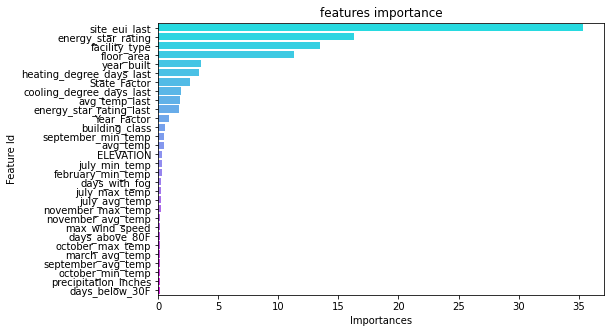

In [101]:
df_feature_importance = pd.DataFrame(model_1.get_feature_importance(prettified=True))
plt.figure(figsize=(8, 5));
feature_plot= sns.barplot(x="Importances", y="Feature Id", data=df_feature_importance[:30],palette="cool");
plt.title('features importance');

## Modelo 2 - CV-modificado -> Kaggle Score: 21.751

+ Se hacen 3 CV sólo del año 6 (para que sea un 10% de train)
+ Solo se valida con datos del año 6
+ Los 3 usan los mismos datos del año 1 al 5 

In [102]:
def get_model():
    cat_params = {
        'iterations': 10000,
        'learning_rate': 0.025,
        'od_wait': 1000,
        'depth': 8,
        #'task_type' : 'GPU',
        #'devices' : '0',
        'verbose' : 1000,
        "objective": "RMSE",
        "loss_function": "RMSE",
        "cat_features" : cat_features
    }
    model =  CatBoostRegressor(**cat_params)
    return model

In [103]:
X_train=train[features_selected]
X_train6=X_train[X_train.Year_Factor==6]
X_train1_5=X_train[X_train.Year_Factor<6]

X_train = X_train.drop(['site_eui','id'],axis=1)
cat_features= list(X_train.select_dtypes(include=['object']).columns)
print(cat_features)
y = train.site_eui
y
y6=X_train6.site_eui
y1_5=X_train1_5.site_eui
X_train6 = X_train6.drop(['site_eui','id'],axis=1)
X_train1_5 = X_train1_5.drop(['site_eui','id'],axis=1)

['State_Factor', 'building_class', 'facility_type', 'floor_area', 'year_built']


In [104]:
from sklearn import model_selection
kfold = model_selection.KFold(3, shuffle=True, random_state=1)
models = []

for train_indices, val_indices in kfold.split(X_train6):
    X_train_cv6 = X_train6.iloc[train_indices]
    X_train_cv=pd.concat([X_train1_5,X_train_cv6])
    y_train_cv = pd.concat([y1_5,y6.iloc[train_indices]])
    X_val_cv = X_train6.iloc[val_indices]
    y_val_cv = y6.iloc[val_indices]
    model = get_model()
    model.fit(X_train_cv, y_train_cv, eval_set=(X_val_cv, y_val_cv))
    models.append(model)

0:	learn: 57.5381355	test: 57.9894503	best: 57.9894503 (0)	total: 99.7ms	remaining: 16m 37s
1000:	learn: 28.3633307	test: 32.3748849	best: 32.3618709 (904)	total: 1m 27s	remaining: 13m 2s
Stopped by overfitting detector  (1000 iterations wait)

bestTest = 32.36187087
bestIteration = 904

Shrink model to first 905 iterations.
0:	learn: 57.7501635	test: 55.9643898	best: 55.9643898 (0)	total: 89.4ms	remaining: 14m 54s
1000:	learn: 29.5823404	test: 31.7407653	best: 31.7391899 (990)	total: 1m 18s	remaining: 11m 45s
2000:	learn: 25.4053099	test: 31.8392989	best: 31.6056832 (1352)	total: 2m 41s	remaining: 10m 44s
Stopped by overfitting detector  (1000 iterations wait)

bestTest = 31.60568317
bestIteration = 1352

Shrink model to first 1353 iterations.
0:	learn: 57.8652521	test: 54.9311985	best: 54.9311985 (0)	total: 77.1ms	remaining: 12m 51s
1000:	learn: 29.6655467	test: 27.4230665	best: 27.4093967 (835)	total: 1m 20s	remaining: 12m 5s
2000:	learn: 26.0022589	test: 27.4704901	best: 27.3671477

In [105]:
X_test=test
X_test=X_test[features_selected]
X_test = X_test.drop(['id','site_eui'], axis=1)

y_predict=np.median([model.predict(X_test) for model in models], axis=0)
y_predict[y_predict<0]=1

In [106]:
submit['site_eui'] = y_predict
submit.to_csv('modelo_cv_3_2.csv',index=False)
submit.head()
#38.465

,id,site_eui
0,75757,139.231244
1,75758,270.017665
2,75759,183.324403
3,75760,260.300626
4,75761,251.492003
